In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
filename = 'glass.csv'
dataset = pd.read_csv(filename)

In [3]:
dataset

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data = dataset.iloc[:,1:-1]
headers = data.columns
labels = dataset.iloc[:,-1]
headers


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [5]:
mean_vals = np.mean(data,axis=0)

In [6]:
std_vals = np.std(data)

In [7]:
normalized_data = data-mean_vals

In [8]:
normalized_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.002645,0.23215,1.805467,-0.344907,-0.870935,-0.437056,-0.206963,-0.175047,-0.057009
1,-0.000755,0.48215,0.915467,-0.084907,0.079065,-0.017056,-1.126963,-0.175047,-0.057009
2,-0.002185,0.12215,0.865467,0.095093,0.339065,-0.107056,-1.176963,-0.175047,-0.057009
3,-0.000705,-0.19785,1.005467,-0.154907,-0.040935,0.072944,-0.736963,-0.175047,-0.057009
4,-0.000945,-0.13785,0.935467,-0.204907,0.429065,0.052944,-0.886963,-0.175047,-0.057009
...,...,...,...,...,...,...,...,...,...
209,-0.002135,0.73215,-2.684533,1.435093,-0.040935,-0.417056,0.223037,0.884953,-0.057009
210,-0.001515,1.51215,-2.684533,0.545093,0.409065,-0.497056,-0.556963,1.414953,-0.057009
211,0.002285,0.95215,-2.684533,0.575093,0.769065,-0.497056,-0.516963,1.464953,-0.057009
212,-0.001855,0.97215,-2.684533,0.495093,0.959065,-0.497056,-0.476963,1.394953,-0.057009


In [9]:
standardized_data = normalized_data/std_vals

In [10]:
standardized_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [13]:
test_array = np.array(standardized_data)


214

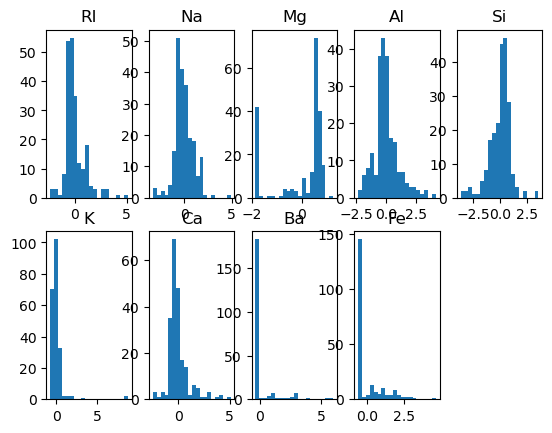

In [19]:
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.hist(test_array[:,i],bins=20)
    plt.title(f'{list(headers)[i]}')
    # plt.show()

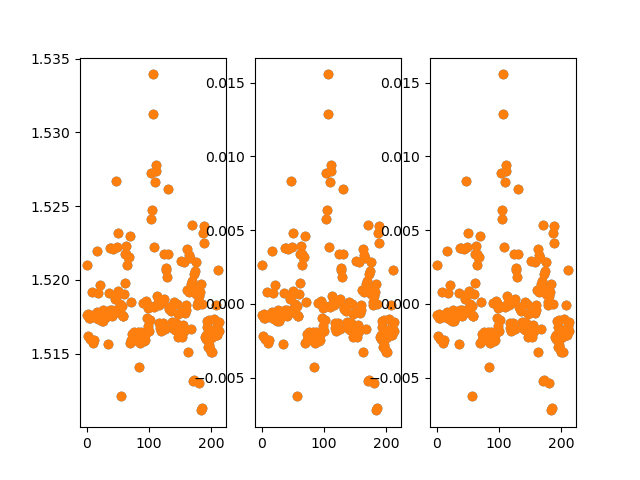

In [ ]:
plt.subplot(1,3,1)
plt.plot(data.iloc[:,0],'o')
plt.subplot(1,3,2)
plt.plot(normalized_data.iloc[:,0],'o')
plt.subplot(1,3,3)
plt.plot(standardized_data.iloc[:,0],'o')
plt.show()

In [ ]:
cov_matrix = np.cov(standardized_data.T)
# cov_matrix = np.cov(standardized_data)

In [ ]:
cov_matrix

array([[ 9.22254137e-06, -4.75859186e-04, -5.35608723e-04,
        -6.17593388e-04, -1.27500978e-03, -5.74047817e-04,
         3.50249823e-03, -5.82883594e-07,  4.23176956e-05],
       [-4.75859186e-04,  6.66841367e-01, -3.22422136e-01,
         6.39256198e-02, -4.41538502e-02, -1.41712931e-01,
        -3.20106090e-01,  1.32610899e-01, -1.92036418e-02],
       [-5.35608723e-04, -3.22422136e-01,  2.08054039e+00,
        -3.46967415e-01, -1.85375148e-01,  5.07584792e-03,
        -9.10915745e-01, -3.53046926e-01,  1.16737133e-02],
       [-6.17593388e-04,  6.39256198e-02, -3.46967415e-01,
         2.49270179e-01, -2.13606248e-03,  1.06138456e-01,
        -1.84449816e-01,  1.19010333e-01, -3.61952964e-03],
       [-1.27500978e-03, -4.41538502e-02, -1.85375148e-01,
        -2.13606248e-03,  5.99921188e-01, -9.76615550e-02,
        -2.30084941e-01, -3.93404195e-02, -7.10939845e-03],
       [-5.74047817e-04, -1.41712931e-01,  5.07584792e-03,
         1.06138456e-01, -9.76615550e-02,  4.253542

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)

print(f'Eigen values: {eig_val}\nEigenvectors: {eig_vec}')

Eigen values: [3.00200916e+00 1.65917340e+00 6.79576475e-01 6.43165731e-01
 2.08456647e-01 1.01165308e-01 9.70300837e-07 1.47744252e-03
 8.99856075e-03]
Eigenvectors: [[-9.28126899e-04 -1.52290883e-03 -1.37689385e-03 -3.10643441e-04
   7.12950233e-04 -1.82174928e-03  9.99986948e-01  4.12235755e-03
  -3.32594524e-04]
 [-1.72248332e-02  3.98797552e-01 -6.54934730e-01  3.46599960e-01
  -3.98381798e-01  1.55680962e-02 -1.39622177e-03  3.62242832e-01
  -3.76900981e-02]
 [ 7.23534913e-01 -5.43050989e-01 -1.31198879e-01  9.86931157e-02
   7.68490459e-02  4.77602532e-02 -1.84522571e-03  3.75274748e-01
  -7.49534298e-02]
 [-4.63352227e-02  2.58840747e-01  5.56521411e-02 -2.70893633e-01
   3.13525755e-01  7.80387063e-01 -3.36314085e-05  3.76132968e-01
  -7.48038453e-02]
 [ 7.69381480e-03  1.94092491e-01  6.91951335e-01  5.70087029e-01
  -1.03320001e-01 -6.02933593e-02 -1.69520029e-04  3.75118036e-01
  -5.87295419e-02]
 [ 7.84042855e-02  1.03826640e-01  2.18565071e-01 -6.77700643e-01
  -5.0801630

In [ ]:
plt.plot((eig_val/np.sum(eig_val)*100),linestyle='--', marker='o')
plt.ylabel('%')

cum_data = np.cumsum(eig_val/np.sum(eig_val)*100)
plt.plot(cum_data,linestyle='--', marker='o',)
plt.ylim(0,120)
plt.legend(['Explained Variance per PC','Cumulative explained variance'])
plt.axhline(80,linestyle='--',color='black')

In [ ]:
# cum_data


In [ ]:
PCA_base = eig_vec[:,0:4] 
# PCA_base

In [ ]:
projected_data = standardized_data@PCA_base   
# projected_data

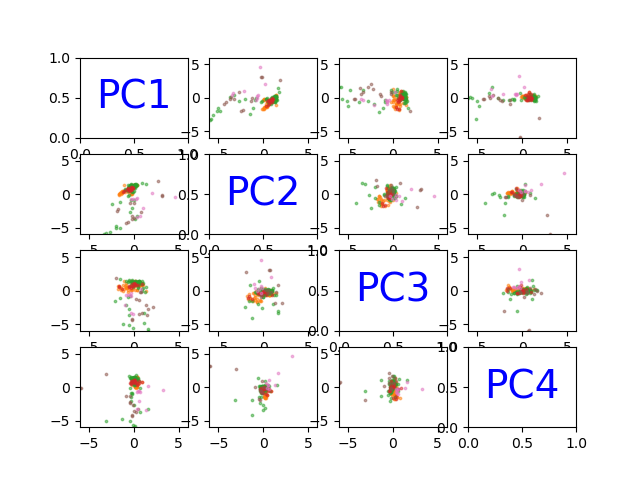

In [ ]:
%matplotlib widget
text_kwargs = dict(ha='center', va='center', fontsize=28, color='b')

place = 1
pca_num = 0
for idx1 in range(4): 
    for idx in range(1,5,1):
        # print(f'Idx = {idx}')
        plt.subplot(4,4,place)
        if (place-1)%5 == 0:
            # plt.hist((projected_data[pca_num][np.array(labels == i)]),bins=25)
            pca_num +=1
            plt.text(0.5, 0.5, f'PC{pca_num}', **text_kwargs)


        else:
            for i in range(7):
                plt.scatter(projected_data[idx1][np.array(labels == i)],projected_data[idx-1][np.array(labels == i)],s=3,alpha=0.5)
                plt.xlim(-6,6)
                plt.ylim(-6,6)
        place += 1
        

# for i in range(4):
#     place = 5*i+1
#     plt.subplot(4,4,place)
#     plt.text(0, 0, f'PCA{i+1}', **text_kwargs)
# plt.show()

In [ ]:
PCA_base[:,0]

rang = np.arange(1,10)
bar_width = 0.20
for i in range(4):
    plt.bar(rang+i*bar_width,PCA_base[:,i],width=bar_width)
plt.legend(['PC1','PC2','PC3','PC4'])
plt.grid()
plt.xticks(rang+bar_width,list(data.columns))
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.title('PCA component coefficients')



Text(0.5, 1.0, 'PCA component coefficients')